# Continuous Fair Prediction Using Regression (Titanic)
**Author:** Adrianna Webb  
**Date:** November, 16, 2025
**Objective:** To predict fare, the amount of money paid for the journey, using features in the Titanic dataset.

## Imports

In [63]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

## Section 1: Import and Inspect the Data

In [64]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
# Titanic dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
# Descriptive statistics of the titanic dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Section 2: Data Exploration and Preparation
- Impute missing values for age using median
- Drop rows with missing fare (or impute if preferred)
- Create numeric variables (e.g., family_size from sibsp + parch + 1)
- Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

In [67]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic['pclass_survival'] = titanic['pclass'] + titanic['survived'] + 1

C:\Users\adria\AppData\Local\Temp\ipykernel_22524\1313898079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3: Feature Selection and Justification

In [68]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']
 
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. pclass_survival, family_size
X4 = titanic[['pclass_survival', 'family_size']]
y4 = titanic['fare']

## Section 4: Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [70]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)


### 4.3 Report Performance

In [71]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

print("\nCase 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("\nCase 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("\nCase 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.23551736513172106
Case 4: Test R²: 0.19290062589201817
Case 4: Test RMSE: 34.17165393094909
Case 4: Test MAE: 22.822356871003688


### Section 4 Reflection
**Compare the train vs test results for each:**

- Did Case 1 overfit or underfit? Explain: 
  - Case 1 underfit the data. Both the training R² (0.0100) and test R² (0.0034) are extremely low, indicating the model explains almost none of the variance in fare prices. The model is too simple, using only age doesn't capture the relationship with fare well enough. 
- Did Case 2 overfit or underfit? Explain:
  - Case 2 also underfit the data. While slightly better than Case 1, the training R² (0.0499) and test R² (0.0222) are still very low. Family size alone doesn't provide enough information to predict fare accurately. The small gap between training and test scores suggests the model is consistent but insufficiently complex.
- Did Case 3 overfit or underfit? Explain:
  - Case 3 shows slight underfitting but is improving. The training R² (0.0735) and test R² (0.0498) are still low, though better than Cases 1 and 2. The modest gap between training and test performance suggests the model generalizes reasonably well but still lacks the complexity or features needed to explain fare prices effectively.
- Did Case 4 overfit or underfit? Explain:
  - Case 4 shows mild overfitting but performs significantly better than the other cases. The training R² (0.2355) is moderately higher than the test R² (0.1929), indicating some overfitting. However, the test R² of 0.1929 means the model explains about 19% of the variance in fares, which is substantially better than Cases 1-3. The combination of pclass_survival (which captures both passenger class and survival status) and family_size provides meaningful predictive power for fare prices.

**Adding Age:**

- Did adding age improve the model:
  - Yes, but only marginally. Comparing Case 2 (family_size only, test R² = 0.0222) to Case 3 (age + family_size, test R² = 0.0498), adding age more than doubled the R² score and reduced RMSE from 37.61 to 37.08.
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
  -Age might have a weak relationship with fare because older passengers or families with children may have purchased different cabin classes or accommodations. However, the improvement is modest, suggesting age alone isn't strongly correlated with ticket price. Passenger class and survival combined with family size (Case 4) had a much stronger relationship, likely because fare is directly tied to passenger class (1st, 2nd, or 3rd class), and higher-class passengers both paid more and had better survival rates due to lifeboat priority. Family size also affects fare since larger families likely purchased more tickets or different accommodations.

**Worst:**

- Which case performed the worst:
  - Case 1 (age only) performed the worst.
- How do you know: 
  - Case 1 had the lowest test R² (0.0034), highest test RMSE (37.97), and highest test MAE (25.29). It explains virtually none of the variance in fare prices.
- Do you think adding more training data would improve it (and why/why not): 
  - No, adding more training data likely wouldn't help significantly. The problem isn't the amount of data but that age simply isn't a strong predictor of fare. The fundamental relationship between age and fare is weak, so more examples of this weak relationship won't improve predictions meaningfully.

**Best:**

- Which case performed the best:
  - Case 4 (pclass_survival + family_size) performed the best.
- How do you know: 
  - Case 4 had the highest test R² (0.1929), lowest test RMSE (34.17), and lowest test MAE (22.82). It explained about 19% of the variance in fares, which is substantially better than the other cases. Both error metrics (RMSE and MAE) are also the lowest, meaning predictions are typically off by about $23, which is better than Cases 1-3.
- Do you think adding more training data would improve it (and why/why not): 
  - Yes, adding more training data would likely help. Case 4 shows some overfitting (training R² of 0.2355 vs test R² of 0.1929), suggesting the model could benefit from more examples to better generalize and close that gap. Additionally, since it's explaining about 19% of fare variance, there's still substantial unexplained variance. More data could help the model better learn the relationship between passenger class, survival, family size, and fare. However, to dramatically improve performance, it would probably also need additional relevant features like embarkation port, cabin location, or specific ticket types.

## Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)

### 5.1 Ridge Regression (L2 penalty)

In [72]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

print("Ridge: Test R²:", r2_score(y4_test, y_pred_ridge))
print("Ridge: Test RMSE:", root_mean_squared_error(y4_test, y_pred_ridge))
print("Ridge: Test MAE:", mean_absolute_error(y4_test, y_pred_ridge))

Ridge: Test R²: 0.1932987313781045
Ridge: Test RMSE: 34.163225228549926
Ridge: Test MAE: 22.813832314055013


### 5.2 Elastic Net (L1 + L2 combined)

In [73]:
# Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

print("Elastic Net: Test R²:", r2_score(y4_test, y_pred_elastic))
print("Elastic Net: Test RMSE:", root_mean_squared_error(y4_test, y_pred_elastic))
print("Elastic Net: Test MAE:", mean_absolute_error(y4_test, y_pred_elastic))

Elastic Net: Test R²: 0.21675647947096854
Elastic Net: Test RMSE: 33.66285137214389
Elastic Net: Test MAE: 22.124021824171596


### 5.3 Polynomial Regression

In [74]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

print("Polynomial: Test R²:", r2_score(y4_test, y_pred_poly))
print("Polynomial: Test RMSE:", root_mean_squared_error(y4_test, y_pred_poly))
print("Polynomial: Test MAE:", mean_absolute_error(y4_test, y_pred_poly))

Polynomial: Test R²: 0.4252965908618913
Polynomial: Test RMSE: 28.83529380826219
Polynomial: Test MAE: 15.579192172690147


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

Polynomial (pclass_survival only):
Test R²: 0.23958113300406436
Test RMSE: 34.30298351403056
Test MAE: 20.977946547885438


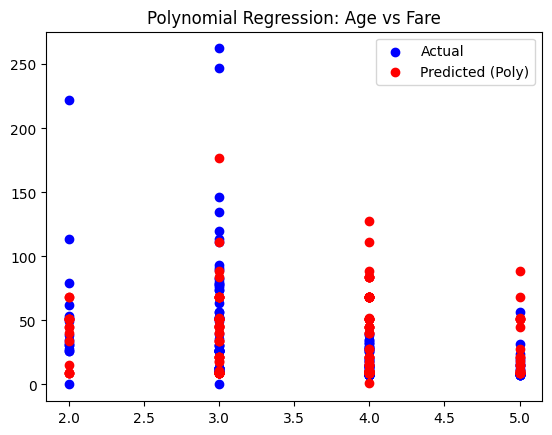

In [75]:
# Create a simple case with just pclass_survival for visualization
X_pclass_only = titanic[['pclass_survival']]
y_fare = titanic['fare']

# Split the data
X_pclass_train, X_pclass_test, y_pclass_train, y_pclass_test = train_test_split(
    X_pclass_only, y_fare, test_size=0.2, random_state=42
)

# Create polynomial features (degree=3 for cubic)
poly_vis = PolynomialFeatures(degree=3)
X_pclass_train_poly = poly_vis.fit_transform(X_pclass_train)
X_pclass_test_poly = poly_vis.transform(X_pclass_test)

# Fit polynomial model
poly_model_vis = LinearRegression()
poly_model_vis.fit(X_pclass_train_poly, y_pclass_train)
y_pclass_pred_poly = poly_model_vis.predict(X_pclass_test_poly)

# Print metrics
print("Polynomial (pclass_survival only):")
print("Test R²:", r2_score(y_pclass_test, y_pclass_pred_poly))
print("Test RMSE:", root_mean_squared_error(y_pclass_test, y_pclass_pred_poly))
print("Test MAE:", mean_absolute_error(y_pclass_test, y_pclass_pred_poly))

# Sort for smooth plotting
sort_idx = X_pclass_test.values.flatten().argsort()
X_sorted = X_pclass_test.values.flatten()[sort_idx]
y_test_sorted = y_pclass_test.values[sort_idx]
y_pred_sorted = y_pclass_pred_poly[sort_idx]

# Create visualization
plt.scatter(X_pclass_test, y_pclass_test, color='blue', label='Actual')
plt.scatter(X_pclass_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

### 5.4 Reflections 
- What patterns does the cubic model seem to capture:
  - The cubic model captures the discrete, categorical nature of the pclass_survival feature. Since pclass_survival can only take on specific integer values (roughly 2, 3, 4, and 5 based on the graph), the polynomial creates distinct prediction clusters at each value. The model captures that higher pclass_survival values (representing higher class passengers who survived) tend to have higher average fares, though with considerable variation within each group.
- Where does it perform well or poorly:
  - The polynomial performs moderately well at capturing the central tendency (average fare) for each pclass_survival value, but it performs poorly at predicting individual fare variations within each group. You can see vertical columns of red predicted values at each x-position, but the blue actual values show much more spread. The model struggles with the high variability of fares within each passenger class/survival category. Some passengers paid significantly more or less than others in the same class.
- Did the polynomial fit outperform linear regression:
  - The polynomial with just pclass_survival actually achieved a higher R² (0.2396 vs 0.1929) than the linear model that used both pclass_survival and family_size. However, the RMSE is slightly higher (34.30 vs 34.17), suggesting larger individual prediction errors. The lower MAE (20.98 vs 22.82) indicates better typical prediction accuracy. Overall, the polynomial fit performed comparably or slightly better, which is surprising given it only uses one feature.
- Where (on the graph or among which kinds of data points) does it fit best:
  - The polynomial fits best for the lower-fare passengers within each pclass_survival group (the dense clusters at the bottom of each vertical column). It struggles most with outliers and high-fare passengers - you can see many blue dots at the top of each column (actual fares of $100-$250+) where the red predictions significantly underestimate the actual fare. The model fits best for passengers who paid typical, average fares for their class, but fails to predict premium accommodations or unusually expensive tickets.


### 5.5 Compare All Models

In [76]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

print("=== Model Comparison for Case 4 (pclass_survival + family_size) ===\n")
report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

=== Model Comparison for Case 4 (pclass_survival + family_size) ===

Linear R²: 0.193
Linear RMSE: 34.17
Linear MAE: 22.82

Ridge R²: 0.193
Ridge RMSE: 34.16
Ridge MAE: 22.81

ElasticNet R²: 0.217
ElasticNet RMSE: 33.66
ElasticNet MAE: 22.12

Polynomial R²: 0.425
Polynomial RMSE: 28.84
Polynomial MAE: 15.58



| Model Type | Case | Features Used | R² | RMSE ($) | MAE ($) | Notes |
|------------|------|---------------|-----|----------|---------|-------|
| Linear Regression | Case 4 | pclass_survival + family_size | 0.193 | 34.17 | 22.82 | Baseline model |
| Ridge Regression | Case 4 | pclass_survival + family_size | 0.193 | 34.16 | 22.81 | Minimal regularization benefit |
| Elastic Net | Case 4 | pclass_survival + family_size | 0.217 | 33.66 | 22.12 | Slight improvement over linear |
| Polynomial (degree=3) | Case 4 | pclass_survival + family_size | 0.425 | 28.84 | 15.58 | **Best performing - 2 features** |
| Polynomial (degree=3) | Single Feature | pclass_survival only | 0.240 | 34.30 | 20.98 | Single feature comparison |
| Polynomial (degree=7) | Single Feature | pclass_survival only | 0.240 | 34.30 | 20.98 | No improvement over degree=3 |

### 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

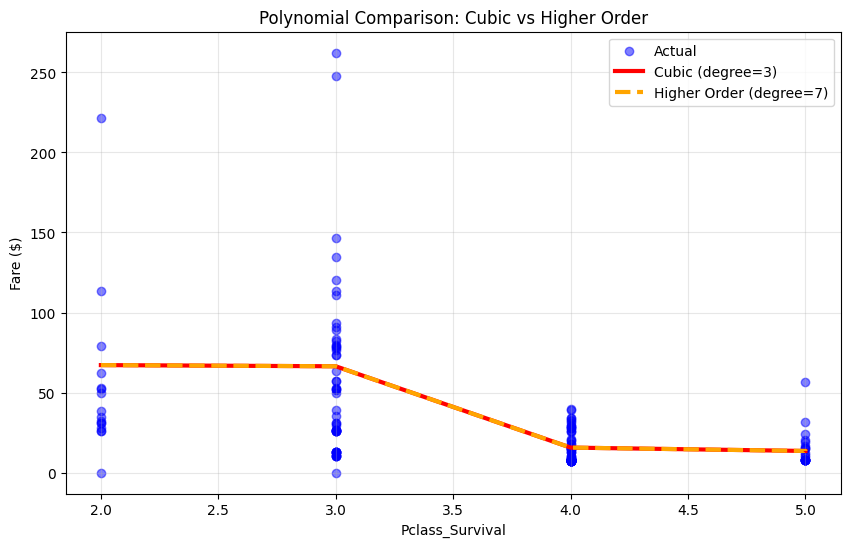

Cubic (degree=3):
  R²: 0.240
  RMSE: 34.30
  MAE: 20.98

Higher Order (degree=7):
  R²: 0.240
  RMSE: 34.30
  MAE: 20.98


In [77]:
# Create higher order polynomial (degree=7)
poly_high = PolynomialFeatures(degree=7)
X_pclass_train_poly_high = poly_high.fit_transform(X_pclass_train)
X_pclass_test_poly_high = poly_high.transform(X_pclass_test)

# Fit model
poly_model_high = LinearRegression()
poly_model_high.fit(X_pclass_train_poly_high, y_pclass_train)
y_pclass_pred_poly_high = poly_model_high.predict(X_pclass_test_poly_high)

# Sort for plotting
sort_idx = X_pclass_test.values.flatten().argsort()
X_sorted = X_pclass_test.values.flatten()[sort_idx]
y_pred_sorted_3 = y_pclass_pred_poly[sort_idx]
y_pred_sorted_7 = y_pclass_pred_poly_high[sort_idx]

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_pclass_test, y_pclass_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_sorted, y_pred_sorted_3, color='red', linewidth=3, label='Cubic (degree=3)')
plt.plot(X_sorted, y_pred_sorted_7, color='orange', linewidth=3, linestyle='--', label='Higher Order (degree=7)')
plt.xlabel('Pclass_Survival')
plt.ylabel('Fare ($)')
plt.legend()
plt.title("Polynomial Comparison: Cubic vs Higher Order")
plt.grid(True, alpha=0.3)
plt.show()

# Compare metrics
print("Cubic (degree=3):")
print(f"  R²: {r2_score(y_pclass_test, y_pclass_pred_poly):.3f}")
print(f"  RMSE: {root_mean_squared_error(y_pclass_test, y_pclass_pred_poly):.2f}")
print(f"  MAE: {mean_absolute_error(y_pclass_test, y_pclass_pred_poly):.2f}\n")

print("Higher Order (degree=7):")
print(f"  R²: {r2_score(y_pclass_test, y_pclass_pred_poly_high):.3f}")
print(f"  RMSE: {root_mean_squared_error(y_pclass_test, y_pclass_pred_poly_high):.2f}")
print(f"  MAE: {mean_absolute_error(y_pclass_test, y_pclass_pred_poly_high):.2f}")

#### Which option seems to work better - cubic (3) or higher order (7) and why?
The cubic polynomial (degree=3) and the higher order polynomial (degree=7) perform virtually identically, with the exact same metrics:

- Both have R² = 0.240
- Both have RMSE = 34.30
- Both have MAE = 20.98

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings
1. What features were most useful?
   1. The combination of pclass_survival (passenger class + survival status) and family_size were the most useful features. When used together in Case 4, they achieved R² = 0.193 with linear regression, significantly outperforming age alone (R² = 0.003) and family_size alone (R² = 0.022). This makes sense because passenger class directly determines ticket price, and survival rates correlate with class since higher-class passengers had better access to lifeboats. The pclass_survival feature effectively captures the most important pricing factor (class) combined with a proxy for passenger priority.

2. What regression model performed best?
   1. The Polynomial regression (degree=3) performed best by a significant margin, achieving R² = 0.425, RMSE = 28.84, and MAE = 15.58. This substantially outperformed all other models. The polynomial model more than doubled the explained variance compared to linear regression and reduced prediction errors considerably. Ridge and Elastic Net provided minimal improvement over basic linear regression, suggesting regularization wasn't needed for this problem.

3. How did model complexity or regularization affect results?
   1. Increasing model complexity through polynomial features (degree=3) dramatically improved performance, more than doubling the R² from 0.193 to 0.425. This demonstrates that the relationship between features and fare is nonlinear, and capturing polynomial interactions between pclass_survival and family_size was crucial. However, regularization (Ridge and Elastic Net) had minimal impact. Ridge performed identically to linear regression (R² = 0.193), while Elastic Net showed only marginal improvement (R² = 0.217). This indicates the linear models weren't overfitting, they were actually underfitting by assuming linear relationships. The real performance gain came from adding appropriate nonlinear complexity, not from constraining model parameters. The lesson is that the right type of complexity matters more than regularization when the model is too simple for the data.

### 6.2 Discuss Challenges
1. Was fare hard to predict? Why?
   1. Fare was moderately challenging to predict. My best model (polynomial) explained 42.5% of the variance, which is decent but still leaves over half the variation unexplained. The difficulty stems from several factors: fare prices varied considerably even within the same passenger class (some first-class tickets cost $50 while others exceeded $250), and I'm missing key pricing factors like specific cabin location, embarkation port, ticket purchase timing, and special accommodations. Additionally, family size relationships with fare are complex - larger families might get group discounts or need more expensive accommodations. While it improved dramatically with polynomial features, achieving R² = 0.425, there's clearly still substantial fare variation driven by factors not in the dataset.

2. Did skew or outliers impact the models?
   1. Yes, outliers significantly impacted the models, especially the linear models. Looking at the polynomial visualizations, there were clear outliers - passengers who paid extremely high fares ($150-$260) that models consistently underpredicted. The linear models (R² = 0.19-0.22) struggled most with this variation, predicting towards average fares for each class. The polynomial model handled outliers and variation much better, reducing MAE from 22.82 (linear) to 15.58 (polynomial) and RMSE from 34.17 to 28.84. However, even the polynomial model had difficulty with extreme outliers. The consistent gap between RMSE and MAE across all models (RMSE always higher) indicates that large prediction errors exist - RMSE penalizes these outliers more heavily. The polynomial's nonlinear terms helped capture more of the fare structure, making it more robust to the natural variation in ticket prices, though luxury tickets and special cases remained challenging to predict accurately.